### 분류 - KNN
- 가장 간단한 머신러닝 분류 학습 알고리즘
- 모델관련 패턴 식 없음 => 데이터마다 거리 계산
- 거리 기반 모델
- 하이퍼파라미터 => k : 최근접 이웃 데이터의 수
- 적용 학습 : 회귀, 분류 모두 가능

In [123]:
# 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#### [1] KNN 이해하기

In [124]:
# 데이터 준비
X = [[0], [1], [2], [3], [4], [5], [6], [7], [8]]
y = [0, 0, 1, 1, 1, 2, 2, 2, 2]

In [125]:
# KNN 학습 모델 객체 생성
knn = KNeighborsClassifier()    # k = 5 default

In [126]:
# 학습
knn.fit(X, y)

KNeighborsClassifier()

In [127]:
# KNN 학습 모델 객체 속성 확인
knn.classes_

array([0, 1, 2])

In [128]:
knn.n_neighbors

5

In [129]:
# 예측
knn.predict([[2.1]])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])

In [130]:
knn.predict_proba([[2.1]])

array([[0.4, 0.6, 0. ]])

In [131]:
knn.predict([[0.1]])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])

In [132]:
knn.predict_proba([[0.1]])

array([[0.4, 0.6, 0. ]])

In [133]:
# 평가
y_pre = knn.predict(X)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [134]:
# 최적의 k 찾기
for _k in range(1, 10):
    knn.n_neighbors = _k
    knn.fit(X, y)

    print(f"[{_k}] : score {knn.score(X, y)}")

[1] : score 1.0
[2] : score 0.7777777777777778
[3] : score 1.0
[4] : score 0.8888888888888888
[5] : score 0.7777777777777778
[6] : score 0.7777777777777778
[7] : score 0.7777777777777778
[8] : score 0.7777777777777778
[9] : score 0.4444444444444444


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

✔️ score가 1.0이면 과대적합

#### [2] KNN 실습
- 데이터 : student_info.csv

[2-1] 데이터 변환
- 범주형 컬럼 추가 => 'tall', 'median', 'small'
- 범주형 컬럼 추가 => BMI 계산 후 '과체중', '정상', '저체중'
    - 몸무게(kg) / (신장(m) * 신장(m))
    - 18.5 >= value 저체중
    - 18.5 < value <= 23 : 정상
    - 23 < value <= 30 : 비만
    - 30 < value : 고도비만

In [149]:
import pandas as pd
stdDF = pd.read_csv('student_info.csv')
stdDF

,no,gender,weight_kg,height_cm
0,1,m,98,198
1,2,m,77,170
2,3,m,70,170
3,4,m,90,198
4,5,m,71,170
...,...,...,...,...
85,88,f,100,190
86,89,f,54,163
87,90,f,57,161
88,91,f,101,198


In [150]:
stdDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   no         90 non-null     int64 
 1   gender     90 non-null     object
 2   weight_kg  90 non-null     int64 
 3   height_cm  90 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.9+ KB


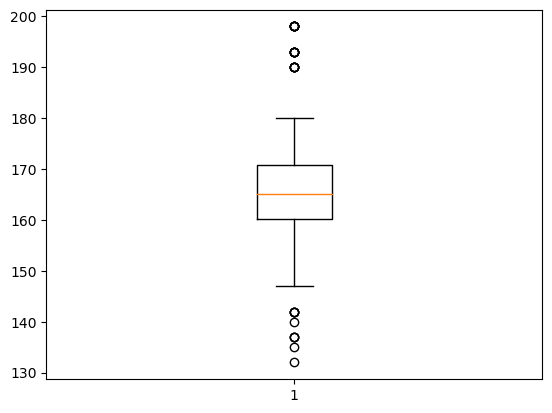

In [151]:
plt.boxplot(stdDF.height_cm)
plt.show()

In [152]:
stdDF['height_cm'].values

array([198, 170, 170, 198, 170, 165, 193, 142, 137, 155, 165, 147, 170,
       140, 165, 132, 137, 165, 165, 180, 168, 142, 193, 165, 142, 165,
       137, 165, 160, 160, 165, 165, 165, 163, 170, 165, 155, 165, 165,
       160, 163, 135, 165, 142, 193, 171, 162, 198, 190, 163, 150, 168,
       168, 193, 170, 163, 198, 190, 163, 160, 168, 168, 193, 160, 162,
       198, 190, 163, 166, 168, 168, 193, 152, 163, 156, 168, 168, 193,
       160, 152, 198, 190, 163, 168, 198, 190, 163, 161, 198, 190],
      dtype=int64)

In [153]:
import numpy as np
stdDF['height'] = np.where(stdDF['height_cm'].values > 170, 'tall',
                           np.where(stdDF['height_cm'].values > 160, 'median', 'small'))

In [155]:
stdDF['bmi_rate'] = stdDF.weight_kg / ((stdDF.height_cm / 100) ** 2)

In [156]:
stdDF['bmi'] = np.where(stdDF.bmi_rate.values > 30, '고도비만',
                             np.where(stdDF.bmi_rate.values > 23, '비만',
                                      np.where(stdDF.bmi_rate.values > 18.5, '정상', '저체중')))

In [157]:
stdDF

,no,gender,weight_kg,height_cm,height,bmi_rate,bmi
0,1,m,98,198,tall,24.997449,비만
1,2,m,77,170,median,26.643599,비만
2,3,m,70,170,median,24.221453,비만
3,4,m,90,198,tall,22.956841,정상
4,5,m,71,170,median,24.567474,비만
...,...,...,...,...,...,...,...
85,88,f,100,190,tall,27.700831,비만
86,89,f,54,163,median,20.324438,정상
87,90,f,57,161,median,21.989892,정상
88,91,f,101,198,tall,25.762677,비만


📌 ex_bmi_knn.ipynb로 이동